# ANOVA
ANOVA, or Analysis of Variance, is a statistical method for comparing means among three or more groups, crucial in understanding group differences and relationships in diverse fields. In this article, we’ll focus on One-way ANOVA.

## What is ANOVA?
ANOVA, or Analysis of Variance is a parametric statistical technique that helps in finding out if there is a significant difference between the mean of three or more groups. It checks the impact of various factors by comparing groups (samples) based on their respective mean. ANOVA tests the null hypothesis that all group means are equal, against the alternative hypothesis that at least one group mean is different.

## One Way ANOVA Hypotheses
One-way ANOVA has the following hypotheses:

Null hypothesis: All population group means are equal.
Alternative hypothesis: Not all population group means are equal.
Reject the null when your p-value is less than your significance level (e.g., 0.05). The differences between the means are statistically significant. Your sample provides sufficiently strong evidence to conclude that the population means are not all equal.

## How to perform One-Way ANOVA?
It is a type of hypothesis test where only one factor is considered. We use F-statistic to perform a one-way analysis of variance. 

Steps Involved
### Step 1 – Define the null and alternative hypothesis.

H0 -> μ1 = μ2 = μ3 (where μ = mean)

Ha -> At least one difference among the means.

#### Step 2 – Find the degree of freedom between and within the groups. [Using Eq-1 and Eq-2]

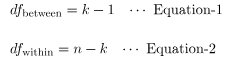


n = number of samples in all groups combined

k = number of groups.

Then, find total degree of freedom. [Using Eq-3]

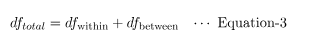

For the next step, we need to understand what F-statistic is. 

##### F-value: It is defined as the ratio of the variance between samples to variance within samples. It is obtained while performing ANOVA test.

Eq-4 shows the F-value formula for one-way ANOVA.

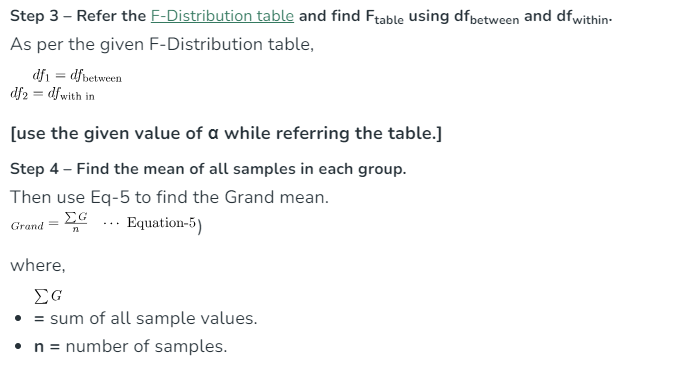
http://uregina.ca/~gingrich/f.pdf

Step 5 – Find the sum of squares total using Eq-6 and sum of squares


Step 6 – Find the variance (μ2 or S2) between and within samples


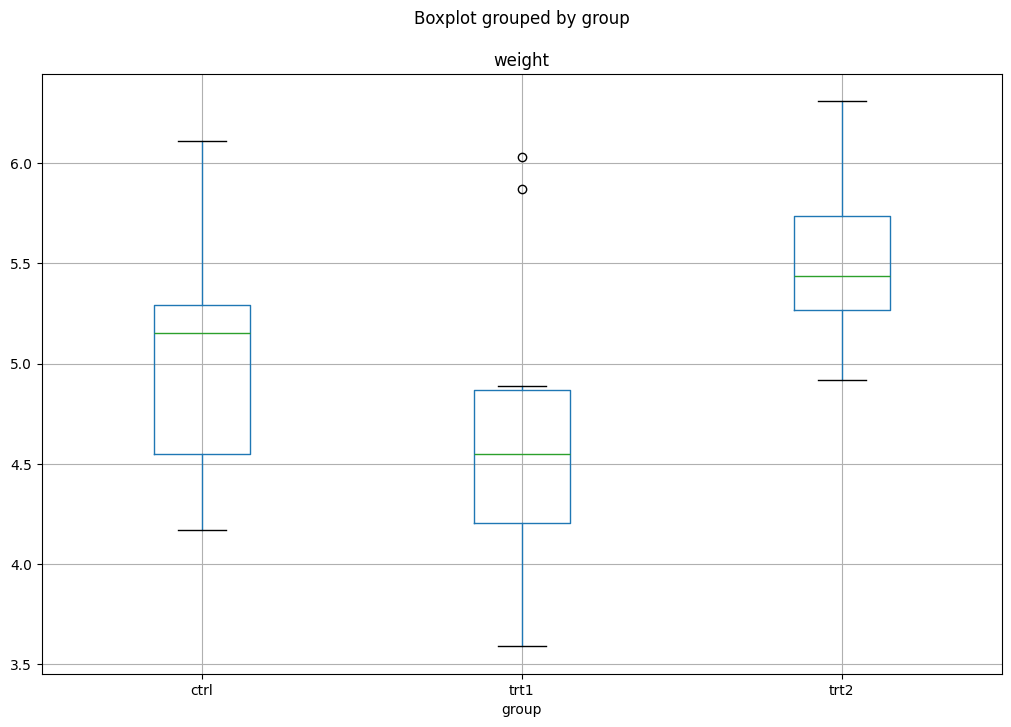

In [1]:
import pandas as pd


datafile = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv'
df = pd.read_csv(datafile)

#Create a boxplot
df.boxplot('weight', by='group', figsize=(12, 8))

ctrl = df['weight'][df.group == 'ctrl']

grps = pd.unique(df.group.values)
d_data = {grp:df['weight'][df.group == grp] for grp in grps}

k = len(pd.unique(df.group))  # number of conditions
N = len(df.values)  # conditions times participants
n = df.groupby('group').size()[0] #Participants in each condition

### Anova usig Scipy


In [2]:
from scipy import stats

F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

print(F, p)

4.846087862380136 0.0159099583256229


### Degrees of Fredoom

In the context of ANOVA (Analysis of Variance), degrees of freedom (df) refer to the number of independent values or quantities which can be assigned to a statistical distribution. There are different types of degrees of freedom used in ANOVA, including the degrees of freedom for the between-group variation and the within-group variation.

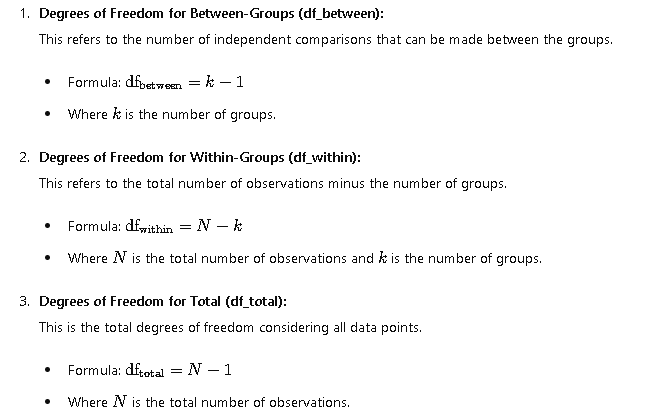

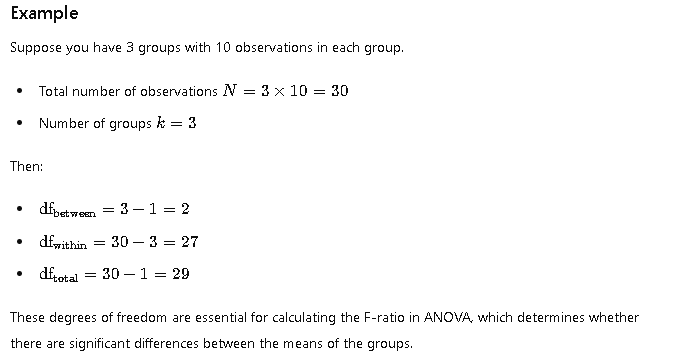

In [3]:
### Calculate the degrees of freedom
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

### Sum of Squares Between, WIthin, and Total

In [8]:
# Between
SSbetween = (sum(df.groupby('group').sum()['weight']**2)/n) \
    - (df['weight'].sum()**2)/N

print(SSbetween)

3.766340000000014


In [9]:
df['weight'].values

array([4.17, 5.58, 5.18, 6.11, 4.5 , 4.61, 5.17, 4.53, 5.33, 5.14, 4.81,
       4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69, 6.31, 5.12,
       5.54, 5.5 , 5.37, 5.29, 4.92, 6.15, 5.8 , 5.26])

In [12]:
# Within
sum_y_squared = sum([value**2 for value in df['weight'].values])
print(sum_y_squared)

786.3183


In [10]:
SSwithin = sum_y_squared - sum(df.groupby('group').sum()['weight']**2)/n
print(SSwithin)

10.492090000000076


In [11]:
# Total
SStotal = sum_y_squared - (df['weight'].sum()**2)/N
print(SStotal)

14.25843000000009


### Means Square Errors and F-value

In [14]:
MSbetween = SSbetween/DFbetween
MSwithin = SSwithin/DFwithin

F = MSbetween/MSwithin
print(F)

4.846087862380118


In [6]:
### Obtaining the p-value

In [16]:
p = stats.f.sf(F, DFbetween, DFwithin)
print(p)

0.015909958325623124


### Calculate Effect sizes: Eta Squared and Omega Squared:

In [17]:
eta_sqrd = SSbetween/SStotal
om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)

results = {'sum_sq':[SSbetween, SSwithin],
           'df':[DFbetween, DFwithin],
           'F':[F, ''],
            'PR(>F)':[p, ''],
          'EtaSq':[eta_sqrd, ''],
          'OmegaSq':[om_sqrd, '']}

aov_table1 = pd.DataFrame(results, 
                          index=['Group', 'Residual'])
    
aov_table1

,sum_sq,df,F,PR(>F),EtaSq,OmegaSq
Group,3.76634,2,4.846088,0.01591,0.264148,0.204079
Residual,10.49209,27,,,,


## Statsmodels One-Way ANOVA

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight ~ group',
                data=df).fit()
mod

In [20]:
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


#### Calculating Eta-Squared

In [10]:
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])

aov_table['EtaSq'] = [esq_sm, 'NaN']
print(aov_table)

            sum_sq    df         F   PR(>F)     EtaSq
group      3.76634   2.0  4.846088  0.01591  0.264148
Residual  10.49209  27.0       NaN      NaN       NaN


## Pairwise Comparisons

In [21]:
pair_t = mod.t_test_pairwise('group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
trt1-ctrl,-0.371,0.278782,-1.330791,0.194388,-0.943013,0.201013,0.194388,False
trt2-ctrl,0.494,0.278782,1.771996,0.087682,-0.078013,1.066013,0.167675,False
trt2-trt1,0.865,0.278782,3.102787,0.004459,0.292987,1.437013,0.013318,True
